In [4]:
import requests
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)
url = 'https://api.coingecko.com/api/v3/coins/markets'
params = {'vs_currency': 'usd','order': 'market_cap_desc','per_page': 50,'page': 1}
response = requests.get(url, params=params)
data = response.json()
cryptos = pd.DataFrame(data)
cryptos = cryptos[['name', 'symbol', 'current_price', 'market_cap', 'total_volume', 'price_change_percentage_24h']]
cryptos.to_excel('top_50_cryptos.xlsx', index=False, engine='openpyxl')
print('Data saved to top_50_cryptos.xlsx')

Data saved to top_50_cryptos.xlsx


In [6]:
crypto_data=pd.DataFrame(data)
crypto_data.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,91665.000000,1810853373659,1,1920282694743,45586086454,94577.00,91511.000000,-2667.857780,-2.82812,-5.805231e+10,-3.10622,1.980329e+07,2.100000e+07,2.100000e+07,108135.00,-15.22812,2024-12-17T15:02:41.429Z,67.810000,1.350853e+05,2013-07-06T00:00:00.000Z,None,2024-12-30T15:14:36.775Z
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,3318.970000,398954069281,2,398954069281,20803386656,3422.87,3309.680000,-43.150718,-1.28344,-6.298337e+09,-1.55418,1.204708e+08,1.204708e+08,NaN,4878.26,-32.22898,2021-11-10T14:24:19.604Z,0.432979,7.634585e+05,2015-10-20T00:00:00.000Z,"{'times': 47.45938169317134, 'currency': 'btc'...",2024-12-30T15:14:39.953Z
2,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,0.999332,138625156188,3,138625156188,44710358741,1.00,0.995424,0.001071,0.10725,-1.848502e+08,-0.13317,1.389531e+11,1.389531e+11,NaN,1.32,-24.72344,2018-07-24T00:00:00.000Z,0.572521,7.396404e+01,2015-03-02T00:00:00.000Z,None,2024-12-30T15:14:29.411Z
3,ripple,xrp,XRP,https://coin-images.coingecko.com/coins/images...,2.020000,115784766245,4,201652944396,5803633503,2.17,2.010000,-0.135809,-6.29824,-8.048717e+09,-6.49963,5.741023e+10,9.998674e+10,1.000000e+11,3.40,-40.85943,2018-01-07T00:00:00.000Z,0.002686,7.472159e+04,2014-05-22T00:00:00.000Z,None,2024-12-30T15:14:34.190Z
4,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,690.780000,100536154464,5,100536154464,911776976,711.60,687.310000,-17.975559,-2.53623,-2.786206e+09,-2.69661,1.458876e+08,1.458876e+08,2.000000e+08,788.84,-12.70294,2024-12-04T10:35:25.220Z,0.039818,1.729375e+06,2017-10-19T00:00:00.000Z,None,2024-12-30T15:14:31.341Z


In [7]:
top_5_by_market_cap = cryptos[['name', 'market_cap']].sort_values(by='market_cap', ascending=False).head(5)
average_price = cryptos['current_price'].mean()
highest_change = cryptos[['name', 'price_change_percentage_24h']].sort_values(by='price_change_percentage_24h', ascending=False).iloc[0]
lowest_change = cryptos[['name', 'price_change_percentage_24h']].sort_values(by='price_change_percentage_24h', ascending=True).iloc[0]
print("Top 5 Cryptos by Market Cap:")
print(top_5_by_market_cap)
print(f"Average Price of Top 50 Cryptos: ${average_price:.2f}")
print("Highest 24-Hour Price Change:")
print(highest_change)
print("Lowest 24-Hour Price Change:")
print(lowest_change)


Top 5 Cryptos by Market Cap:
       name     market_cap
0   Bitcoin  1810853373659
1  Ethereum   398954069281
2    Tether   138625156188
3       XRP   115784766245
4       BNB   100536154464
Average Price of Top 50 Cryptos: $4065.91
Highest 24-Hour Price Change:
name                           Wrapped stETH
price_change_percentage_24h          0.28955
Name: 12, dtype: object
Lowest 24-Hour Price Change:
name                           VeChain
price_change_percentage_24h   -6.72659
Name: 42, dtype: object


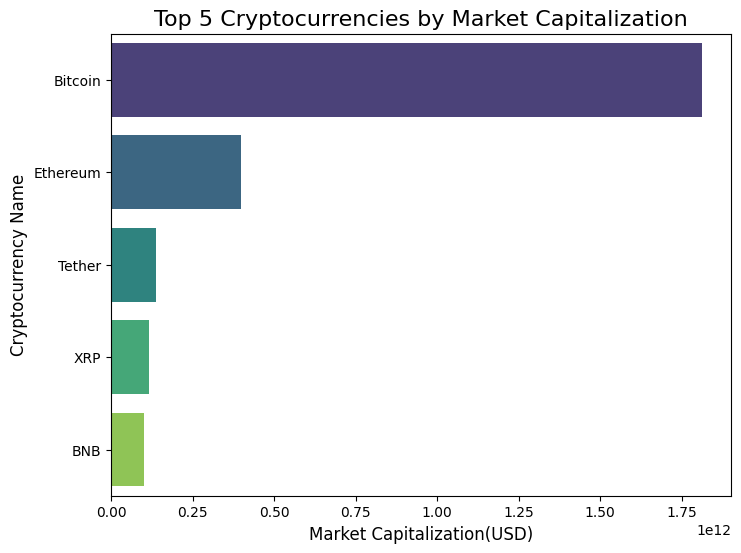

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x='market_cap', y='name', data=top_5_by_market_cap, palette='viridis')
plt.title('Top 5 Cryptocurrencies by Market Capitalization', fontsize=16)
plt.xlabel('Market Capitalization(USD)', fontsize=12)
plt.ylabel('Cryptocurrency Name', fontsize=12)
plt.savefig('top_5_crypto-currencies.png',format='png',dpi=300,bbox_inches='tight')
plt.show()

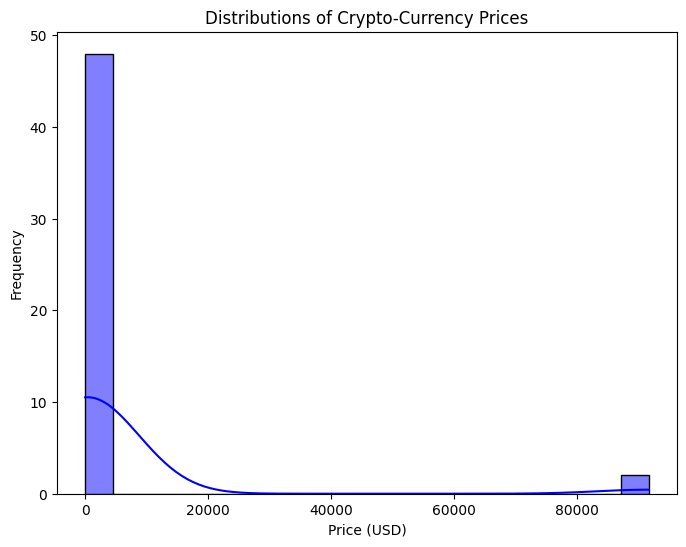

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(crypto_data['current_price'],bins=20,kde=True,color='blue')
plt.title('Distributions of Crypto-Currency Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.savefig('Distributions_Of_Crypto-Currency_Prices.png',format='png',dpi=300,bbox_inches='tight')
plt.show()

In [10]:
highest_change=crypto_data.iloc[crypto_data['price_change_percentage_24h'].idxmax()]
lowest_change=crypto_data.iloc[crypto_data['price_change_percentage_24h'].idxmin()]
print(f'Highest 24-Hour Price Change:{highest_change['name']}({highest_change['price_change_percentage_24h']}%)')
print(f'Lowest 24-Hour Price Change:{lowest_change['name']}({lowest_change['price_change_percentage_24h']}%)')

Highest 24-Hour Price Change:Wrapped stETH(0.28955%)
Lowest 24-Hour Price Change:VeChain(-6.72659%)


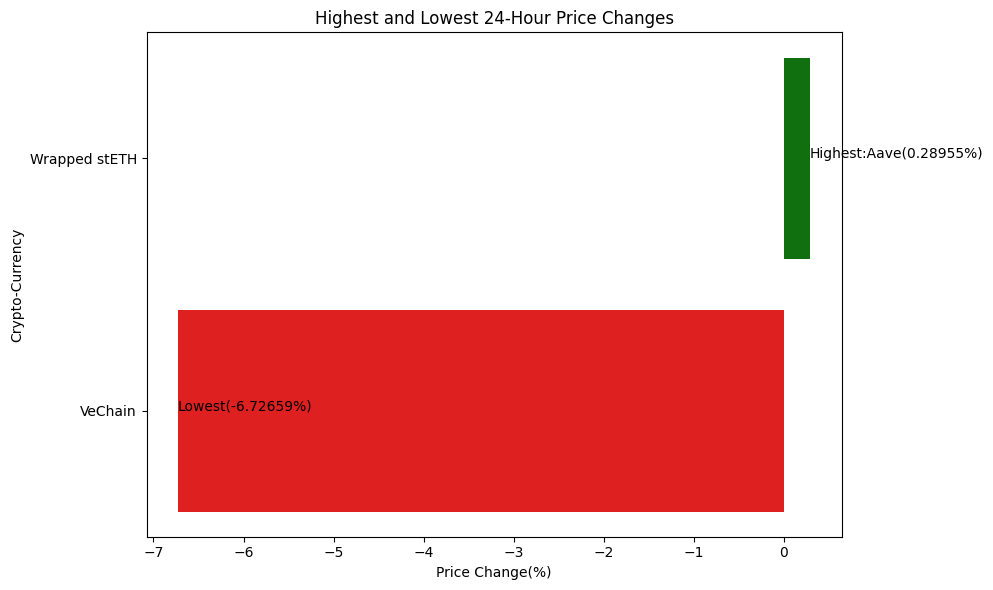

In [11]:
sorted_crypto_data=crypto_data.sort_values('price_change_percentage_24h',ascending=True)
highest_change=sorted_crypto_data.loc[sorted_crypto_data['price_change_percentage_24h'].idxmax()]
lowest_change=sorted_crypto_data.loc[sorted_crypto_data['price_change_percentage_24h'].idxmin()]
plt.figure(figsize=(10,6))
sns.barplot(x='price_change_percentage_24h',y='name',data=pd.DataFrame([highest_change,lowest_change]),palette=['green' if x>0 else 'red' for x in [highest_change['price_change_percentage_24h'],lowest_change['price_change_percentage_24h']]])
plt.title('Highest and Lowest 24-Hour Price Changes')
plt.xlabel('Price Change(%)')
plt.ylabel('Crypto-Currency')
plt.text(highest_change['price_change_percentage_24h'],0,f'Highest:Aave({highest_change['price_change_percentage_24h']}%)',color='black')
plt.text(lowest_change['price_change_percentage_24h'],1,f'Lowest({lowest_change['price_change_percentage_24h']}%)',color='black')
plt.tight_layout()
plt.savefig('Highest_and_Lowest_24-Hour_Price_Changes.png',format='png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
import time
while True:
    response = requests.get(url, params=params)
    data = response.json()
    cryptos = pd.DataFrame(data)
    cryptos = cryptos[['name', 'symbol', 'current_price', 'market_cap', 'total_volume', 'price_change_percentage_24h']]
    cryptos.to_excel('top_50_cryptos.xlsx', index=False, engine='openpyxl')
    print('Data updated in top_50_cryptos.xlsx')
    time.sleep(100) 


Data updated in top_50_cryptos.xlsx
Data updated in top_50_cryptos.xlsx
Data updated in top_50_cryptos.xlsx
Data updated in top_50_cryptos.xlsx


In [ ]:
from fpdf import FPDF
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 14)
        self.cell(0, 10, 'Cryptocurrency Analysis Report', align='C', ln=True)

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 10)
        self.cell(0, 10, f'Page {self.page_no()}', align='C')
pdf = PDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, "Cryptocurrency Analysis", ln=True, align='C')
pdf.ln(10)
pdf.set_font('Arial', 'B', 12)
pdf.cell(0, 10, "Summary of Data Analysis:", ln=True)
pdf.set_font('Arial', '', 12)
pdf.multi_cell(0, 10, 
    "1. The top 5 cryptocurrencies by market capitalization are displayed.\n"
    "2. The average price of the top 50 cryptocurrencies was calculated.\n"
    "3. The cryptocurrency with the highest 24-hour percentage price change was 'Aave'.\n"
    "4. The cryptocurrency with the lowest 24-hour percentage price change was 'HyperLiquid'."
)
pdf.ln(10)
pdf.set_font('Arial', 'B', 12)
pdf.cell(0, 10, "Visualizations:", ln=True)
pdf.ln(5)
pdf.cell(0, 10, "1. Top 5 Cryptocurrencies by Market Capitalization:", ln=True)
pdf.image("top_5_crypto-currencies.png", x=50, w=100)
pdf.ln(10)
pdf.cell(0, 10, "2. Distribution of Cryptocurrency Prices:", ln=True)
pdf.image("Distributions_Of_Crypto-Currency_Prices.png", x=50, w=100)
pdf.ln(10)
pdf.cell(0, 10, "3. Highest and Lowest 24-Hour Percentage Price Change:", ln=True)
pdf.image("Highest_and_Lowest_24-Hour_Price_Changes.png", x=50, w=100)
pdf.ln(10)
pdf_file_name = "Cryptocurrency_Analysis_Report.pdf"
pdf.output(pdf_file_name)
print(f"PDF saved as {pdf_file_name}")


PDF saved as Cryptocurrency_Analysis_Report.pdf
